# Final Project
Data Science Technology and System PG(11523)


Data Science pipeline on-premises and on-the-cloud


Neha Pandey


u3231677

# Problem: Predicting Airplane Delays

The goals of this notebook are:
- Process and create a dataset from downloaded ZIP files
- Exploratory data analysis (EDA)
- Establish a baseline model and improve it

## Introduction to business scenario
You work for a travel booking website that is working to improve the customer experience for flights that were delayed. The company wants to create a feature to let customers know if the flight will be delayed due to weather when the customers are booking the flight to or from the busiest airports for domestic travel in the US. 

You are tasked with solving part of this problem by leveraging machine learning to identify whether the flight will be delayed due to weather. You have been given access to the a dataset of on-time performance of domestic flights operated by large air carriers. You can use this data to train a machine learning model to predict if the flight is going to be delayed for the busiest airports.

### Dataset
The provided dataset contains scheduled and actual departure and arrival times reported by certified US air carriers that account for at least 1 percent of domestic scheduled passenger revenues. The data was collected by the Office of Airline Information, Bureau of Transportation Statistics (BTS). The dataset contains date, time, origin, destination, airline, distance, and delay status of flights for flights between 2014 and 2018.
The data are in 60 compressed files, where each file contains a CSV for the flight details in a month for the five years (from 2014 - 2018). The data can be downloaded from this link: [https://ucstaff-my.sharepoint.com/:f:/g/personal/ibrahim_radwan_canberra_edu_au/Er0nVreXmihEmtMz5qC5kVIB81-ugSusExPYdcyQTglfLg?e=bNO312]. Please download the data files and place them on a relative path. Dataset(s) used in this assignment were compiled by the Office of Airline Information, Bureau of Transportation Statistics (BTS), Airline On-Time Performance Data, available with the following link: [https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ]. 

# Step 1: Problem formulation and data collection

Start this project off by writing a few sentences below that summarize the business problem and the business goal you're trying to achieve in this scenario. Include a business metric you would like your team to aspire toward. With that information defined, clearly write out the machine learning problem statement. Finally, add a comment or two about the type of machine learning this represents. 


### 1. Determine if and why ML is an appropriate solution to deploy.

The majority of the customer services related to flight passengers are not reserved but are provided on a real-time basis.
A flight delay (departure or arrival) delays and negatively affects those services, which in turn are associated with
negative customer emotions, loyalty or retains or repurchase intention, and the spread of negative word-of-mouth (Kim and Park, 2016).
Therefore, it is essential for travel booking website management to improve customer satisfaction and loyalty. However, this requires
advanced knowledge of delays due to weather. Machine Learning (ML) builds a model that makes predictions based on past data in the presence of uncertainty and
therefore, helps the company in predicting delays in advance. An accurate prediction, in turn, helps in decision-making
in providing appropriate customer service solutions by accurately evaluating the demand and supply of services. So, yes, ML is an appropriate solution to deploy.


Here is the reasons we choose ML for deployment.

a. It minimize cost due to presence of optimization.

b. It gives fewer dependencies on external data sources and cloud service.

c. Easy to compute algorithmically complex models due to presence of local processing power

d. Easy debug an offline model when failures occur or tune hyperparameters since it runs on powerful servers

e. Web services can provide cheaper and near real-time predictions.

f. The model can be easily made available to other applications through API calls and so on

g. We can customize it to the requirements of a specific device.

We can easily deploy the model to a device, and its runtime environment cannot be tampered with by an external party It is also easy to.


Reference:
Kim, Nam-Yi and Park, Jin-Woo (2016).A study on the impact of airline service delays on emotional reactions
and customer behavior. Journal of Air Transport Management. Volume 57, October 2016, Pages 19-25. https://www.sciencedirect.com/science/article/abs/pii/S0969699716300229?via%3Dihub



### 2. Formulate the business problem, success metrics, and desired ML output.

Business problem: Flight delays has become a very important subject for air transportation all over the world because of the associated financial loses that the aviation industry is going through. According to data from the Bureau of Transportation Statistics (BTS) of the United Stated, over 20% of US flights were delayed during 2018, which resulted in a severe economic impact equivalent to 41 billion US$. Since data set has all the information regarding flights for example timing of arrival, delay, day, date, ets. We can use it for prediction purposes.

Success metrics: We are comparing accuracies including confusing matrix plot, ROC, precision,sensitivity and specificity.


Desired ML output: We are trying to predict delays of flight after giving inputs as distance, time, day, date and other information.


### 3. Identify the type of ML problem you’re dealing with.

We are trying to develop a model for predicting flight delay based on machine learning. Machine learning is one of the newest methods employed in solving problems with high level of complexity and massive amount of data. Moreover, ML is capable to automatically extract the important features from data. We are dealing with binary classification here.

### Setup

Now that we have decided where to focus our energy, let's set things up so you can start working on solving the problem.

In [1]:
import os
from pathlib2 import Path
from zipfile import ZipFile
import time
import glob

import pandas as pd
import numpy as np
import subprocess

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# <please add any other library or function you are aiming to import here>
import re
from sklearn.model_selection import train_test_split

c:\users\neha pandey\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Step 2: Data preprocessing and visualization  
In this data preprocessing phase, you should take the opportunity to explore and visualize your data to better understand it. First, import the necessary libraries and read the data into a Pandas dataframe. After that, explore your data. Look for the shape of the dataset and explore your columns and the types of columns you're working with (numerical, categorical). Consider performing basic statistics on the features to get a sense of feature means and ranges. Take a close look at your target column and determine its distribution.

### Specific questions to consider
1. What can you deduce from the basic statistics you ran on the features? 

2. What can you deduce from the distributions of the target classes?

3. Is there anything else you deduced from exploring the data?

Start by bringing in the dataset from an Amazon S3 public bucket to this notebook environment.

In [3]:
# download the files

# <note: make them all relative, absolute path is not accepted>
zip_path = 'final_data'
base_path = 'final_assign'
csv_base_path = 'csv_data'

!mkdir -p {csv_base_path}

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file csv_data already exists.
Error occurred while processing: csv_data.


In [4]:
# How many zip files do we have? write a code to answer it.

Totalno_file = 0
for path in os.listdir(zip_path):
    if os.path.isfile(os.path.join(zip_path,path)):
        Totalno_file+=1
    
print("Number of zip files is:{}".format(Totalno_file))

Number of zip files is:60


#### Extract CSV files from ZIP files

In [5]:
def zip2csv(zipFile_name , file_path):
    """
    Extract csv from zip files
    zipFile_name: name of the zip file
    file_path : name of the folder to store csv
    """

    try:
        with ZipFile(zipFile_name, 'r') as z: 
            print(f'Extracting {zipFile_name} ') 
            z.extractall(path=file_path) 
    except:
        print(f'zip2csv failed for {zipFile_name}')

for files in os.listdir(zip_path):
    file = os.path.join(zip_path,files)
    zip2csv(file, csv_base_path)

print("Files Extracted")

Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_1.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_10.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_11.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_12.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_2.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_3.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_4.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_5.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_6.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2014_7.zip 
Extracting final_data\On_Time_Reporting_Carrier_On_Time_Performance

In [6]:
# How many csv files have we extracted? write a code to answer it.
Totalno_file = 0
for path in os.listdir(csv_base_path):
    if os.path.isfile(os.path.join(csv_base_path,path)):
        Totalno_file+=1
    
print("Number of zip files is:{}".format(Totalno_file))

Number of zip files is:61


Before loading the CSV file, read the HTML file from the extracted folder. This HTML file includes the background and more information on the features included in the dataset.

In [7]:
from IPython.display import IFrame

IFrame(src=os.path.relpath(f"{csv_base_path}/readme.html"), width=1000, height=600)

#### Load sample CSV

Before combining all the CSV files, get a sense of the data from a single CSV file. Using Pandas, read the `On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv` file first. You can use the Python built-in `read_csv` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)).

In [8]:
df_temp = pd.read_csv("csv_data/On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2018_9.csv")

**Question**: Print the row and column length in the dataset, and print the column names.

In [9]:
df_shape = df_temp.shape
print(f'Rows and columns in one csv file is {df_shape}')

Rows and columns in one csv file is (585749, 110)


**Question**: Print the first 10 rows of the dataset.  

In [10]:
# Enter your code here
df_temp.head(10)

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2018        3      9           3          1  2018-09-03                9E   
1  2018        3      9           9          7  2018-09-09                9E   
2  2018        3      9          10          1  2018-09-10                9E   
3  2018        3      9          13          4  2018-09-13                9E   
4  2018        3      9          14          5  2018-09-14                9E   
5  2018        3      9          16          7  2018-09-16                9E   
6  2018        3      9          17          1  2018-09-17                9E   
7  2018        3      9          20          4  2018-09-20                9E   
8  2018        3      9          21          5  2018-09-21                9E   
9  2018        3      9          23          7  2018-09-23                9E   

   DOT_ID_Reporting_Airline IATA_CODE_Reporting_Airline Tail_Number  ...  \
0                     20363                          9E      N908XJ  ...   
1                     20363                          9E      N315PQ  ...   
2                     20363                          9E      N582CA  ...   
3                     20363                          9E      N292PQ  ...   
4                     20363                          9E      N600LR  ...   
5                     20363                          9E      N316PQ  ...   
6                     20363                          9E      N916XJ  ...   
7                     20363                          9E      N371CA  ...   
8                     20363                          9E      N601LR  ...   
9                     20363                          9E      N906XJ  ...   

   Div4TailNum  Div5Airport  Div5AirportID  Div5AirportSeqID Div5WheelsOn  \
0          NaN          NaN            NaN               NaN          NaN   
1          NaN          NaN            NaN               NaN          NaN   
2          NaN          NaN            NaN               NaN          NaN   
3          NaN          NaN            NaN               NaN          NaN   
4          NaN          NaN            NaN               NaN          NaN   
5          NaN          NaN            NaN               NaN          NaN   
6          NaN          NaN            NaN               NaN          NaN   
7          NaN          NaN            NaN               NaN          NaN   
8          NaN          NaN            NaN               NaN          NaN   
9          NaN          NaN            NaN               NaN          NaN   

  Div5TotalGTime Div5LongestGTime  Div5WheelsOff Div5TailNum  Unnamed: 109  
0            NaN              NaN            NaN         NaN           NaN  
1            NaN              NaN            NaN         NaN           NaN  
2            NaN              NaN            NaN         NaN           NaN  
3            NaN              NaN            NaN         NaN           NaN  
4            NaN              NaN            NaN         NaN           NaN  
5            NaN              NaN            NaN         NaN           NaN  
6            NaN              NaN            NaN         NaN           NaN  
7            NaN              NaN            NaN         NaN           NaN  
8            NaN              NaN            NaN         NaN           NaN  
9            NaN              NaN            NaN         NaN           NaN  

[10 rows x 110 columns]

**Question**: Print all the columns in the dataset. Use `<dataframe>.columns` to view the column names.

In [11]:
print(f'The column names are :')
print('#########')
for col in df_temp.columns:# **ENTER YOUR CODE HERE**
    print(col)

The column names are :
#########
Year
Quarter
Month
DayofMonth
DayOfWeek
FlightDate
Reporting_Airline
DOT_ID_Reporting_Airline
IATA_CODE_Reporting_Airline
Tail_Number
Flight_Number_Reporting_Airline
OriginAirportID
OriginAirportSeqID
OriginCityMarketID
Origin
OriginCityName
OriginState
OriginStateFips
OriginStateName
OriginWac
DestAirportID
DestAirportSeqID
DestCityMarketID
Dest
DestCityName
DestState
DestStateFips
DestStateName
DestWac
CRSDepTime
DepTime
DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
DepTimeBlk
TaxiOut
WheelsOff
WheelsOn
TaxiIn
CRSArrTime
ArrTime
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
ArrTimeBlk
Cancelled
CancellationCode
Diverted
CRSElapsedTime
ActualElapsedTime
AirTime
Flights
Distance
DistanceGroup
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
FirstDepTime
TotalAddGTime
LongestAddGTime
DivAirportLandings
DivReachedDest
DivActualElapsedTime
DivArrDelay
DivDistance
Div1Airport
Div1AirportID
Div1AirportSeqID
Div1WheelsOn
Div1

**Question**: Print all the columns in the dataset that contain the word 'Del'. This will help you see how many columns have delay data in them.

**Hint**: You can use a Python list comprehension to include values that pass certain `if` statement criteria.

For example: `[x for x in [1,2,3,4,5] if x > 2]`  

**Hint**: You can use the `in` keyword ([documentation](https://www.w3schools.com/python/ref_keyword_in.asp)) to check if the value is in a list or not. 

For example: `5 in [1,2,3,4,5]`

In [12]:
# Enter your code here

for name in list(df_temp.columns):
    if(re.findall('Del',name)):
        print(name)

DepDelay
DepDelayMinutes
DepDel15
DepartureDelayGroups
ArrDelay
ArrDelayMinutes
ArrDel15
ArrivalDelayGroups
CarrierDelay
WeatherDelay
NASDelay
SecurityDelay
LateAircraftDelay
DivArrDelay


Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [98]:
# to answer above questions, complete the following code
print("The total number of rows and columns in this dataset are", df_temp.shape[0], " and ",  df_temp.shape[1])
print("")
print("year included in the dataset: ", df_temp.Year.unique()[0])
print("")
print("The months covered in this dataset are: ",df_temp.Month.unique()[0])
print("")
print("The date range for data is :" , min(df_temp["DayofMonth"]), " to ", max(df_temp["DayofMonth"]))
print("")
print("The airlines covered in this dataset are: ", list(df_temp.Reporting_Airline.unique()))
print("")
print("The Origin airports covered are: ", list(df_temp.Origin.unique()))
print("")
print("The Destination airports covered are: ", list(df_temp.Dest.unique()))

The total number of rows and columns in this dataset are 585749  and  110

year included in the dataset:  2018

The months covered in this dataset are:  9

The date range for data is : 1  to  30

The airlines covered in this dataset are:  ['9E', 'B6', 'WN', 'YV', 'YX', 'EV', 'AA', 'AS', 'DL', 'HA', 'UA', 'F9', 'G4', 'MQ', 'NK', 'OH', 'OO']

The Origin airports covered are:  ['DFW', 'LGA', 'MSN', 'MSP', 'ATL', 'BDL', 'VLD', 'JFK', 'RDU', 'CHS', 'DTW', 'GRB', 'PVD', 'SHV', 'FNT', 'PIT', 'RIC', 'RST', 'RSW', 'CVG', 'LIT', 'ORD', 'JAX', 'TRI', 'BOS', 'CWA', 'DCA', 'CHO', 'AVP', 'IND', 'GRR', 'BTR', 'MEM', 'TUL', 'CLE', 'STL', 'BTV', 'OMA', 'MGM', 'TVC', 'SAV', 'GSP', 'EWR', 'OAJ', 'BNA', 'MCI', 'TLH', 'ROC', 'LEX', 'PWM', 'BUF', 'AGS', 'CLT', 'GSO', 'BWI', 'SAT', 'PHL', 'TYS', 'ACK', 'DSM', 'GNV', 'AVL', 'BGR', 'MHT', 'ILM', 'MOT', 'IAH', 'SBN', 'SYR', 'ORF', 'MKE', 'XNA', 'MSY', 'PBI', 'ABE', 'HPN', 'EVV', 'ALB', 'LNK', 'AUS', 'PHF', 'CHA', 'GTR', 'BMI', 'BQK', 'CID', 'CAK', 'ATW', 'ABY',

**Question**: What is the count of all the origin and destination airports?

**Hint**: You can use the Pandas `values_count` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)) to find out the values for each airport using the columns `Origin` and `Dest`.

In [21]:
counts = pd.DataFrame({'Origin':df_temp["Origin"].value_counts(), 'Destination':df_temp["Dest"].value_counts()})
counts

Origin  Destination
ABE     303          303
ABI     169          169
ABQ    2077         2076
ABR      60           60
ABY      79           79
..      ...          ...
WRG      60           60
WYS      52           52
XNA    1004         1004
YAK      60           60
YUM      96           96

[346 rows x 2 columns]

**Question**: Print the top 15 origin and destination airports based on number of flights in the dataset.

**Hint**: You can use the Pandas `sort_values` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)).

In [99]:
counts.sort_values(by=["Origin","Destination"],ascending=False).head(15 )

Origin  Destination
ATL   31525        31521
ORD   28257        28250
DFW   22802        22795
DEN   19807        19807
CLT   19655        19654
LAX   17875        17873
SFO   14332        14348
IAH   14210        14203
LGA   13850        13850
MSP   13349        13347
LAS   13318        13322
PHX   13126        13128
DTW   12725        12724
BOS   12223        12227
SEA   11872        11877

**Question**: Given all the information about a flight trip, can you predict if it would be delayed?

Yes, we can predict the flight delay with given information

Now, assume you are traveling from San Francisco to Los Angeles on a work trip. You want to have an ideas if your flight will be delayed, given a set of features, so that you can manage your reservations in Los Angeles better. How many features from this dataset would you know before your flight?

Columns such as `DepDelay`, `ArrDelay`, `CarrierDelay`, `WeatherDelay`, `NASDelay`, `SecurityDelay`, `LateAircraftDelay`, and `DivArrDelay` contain information about a delay. But this delay could have occured at the origin or destination. If there were a sudden weather delay 10 minutes before landing, this data would not be helpful in managing your Los Angeles reservations.

So to simplify the problem statement, consider the following columns to predict an arrival delay:<br>

`Year`, `Quarter`, `Month`, `DayofMonth`, `DayOfWeek`, `FlightDate`, `Reporting_Airline`, `Origin`, `OriginState`, `Dest`, `DestState`, `CRSDepTime`, `DepDelayMinutes`, `DepartureDelayGroups`, `Cancelled`, `Diverted`, `Distance`, `DistanceGroup`, `ArrDelay`, `ArrDelayMinutes`, `ArrDel15`, `AirTime`

You will also filter the source and destination airports to be:
- Top airports: ATL, ORD, DFW, DEN, CLT, LAX, IAH, PHX, SFO
- Top 5 airlines: UA, OO, WN, AA, DL

This should help in reducing the size of data across the CSV files to be combined.

#### Combine all CSV files

**Hint**:  
First, create an empy dataframe that you will use to copy your individual dataframes from each file. Then, for each file in the `csv_files` list:

1. Read the CSV file into a dataframe  
2. Filter the columns based on the `filter_cols` variable

```
        columns = ['col1', 'col2']
        df_filter = df[columns]
```

3. Keep only the subset_vals in each of the subset_cols. Use the `isin` Pandas function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html)) to check if the `val` is in the dataframe column and then choose the rows that include it.

```
        df_eg[df_eg['col1'].isin('5')]
```

4. Concatenate the dataframe with the empty dataframe 

In [100]:
def combine_csv(csv_files, filter_cols, subset_cols, subset_vals, file_name):
    """
    Combine csv files into one Data Frame
    csv_files: list of csv file paths
    filter_cols: list of columns to filter
    subset_cols: list of columns to subset rows
    subset_vals: list of list of values to subset rows
    """
    
    df = pd.DataFrame() #This is empty dataframe
    
    csv_list = []
    
    for i in os.listdir(csv_files):
        if i.endswith('.csv'):
            csv_list.append(os.path.join(csv_files,i))
        
        

    
    for filename in csv_list:
        
        # to read content of csv files
        csv_df = pd.read_csv(os.path.join(filename))
        
        
        # To filter columns 
        filter_df = csv_df[filter_cols]
        
        # subseting the dataframe based on subset column
        df_subset = filter_df[filter_df[subset_cols[0]].isin(subset_vals[0]) & filter_df[subset_cols[1]].isin(subset_vals[1])]
        
        # subset values based on 'Reporting_Airlines' 
        df_subset = df_subset[df_subset[subset_cols[2]].isin(subset_vals[2])]
        
        # To concatenate the dataframe (empty)
        df = pd.concat([df, df_subset], ignore_index = True)
        
        # Saving the database as CSV
        df.to_csv(file_name, index=False)
        


In [101]:
#cols is the list of columns to predict Arrival Delay 
cols = ['Year','Quarter','Month','DayofMonth','DayOfWeek','FlightDate',
        'Reporting_Airline','Origin','OriginState','Dest','DestState',
        'CRSDepTime','Cancelled','Diverted','Distance','DistanceGroup',
        'ArrDelay','ArrDelayMinutes','ArrDel15','AirTime']

subset_cols = ['Origin', 'Dest', 'Reporting_Airline']

# subset_vals is a list collection of the top origin and destination airports and top 5 airlines
subset_vals = [['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['ATL', 'ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'IAH', 'PHX', 'SFO'], 
               ['UA', 'OO', 'WN', 'AA', 'DL']]

Use the function above to merge all the different files into a single file that you can read easily. 

**Note**: This will take 5-7 minutes to complete.

In [26]:
start = time.time()

combined_csv_filename = f"{base_path}combined_files.csv"

# < write code to call the combined_csv function>
combine_csv(csv_base_path, cols, subset_cols, subset_vals, combined_csv_filename)

print(f'csv\'s merged in {round((time.time() - start)/60,2)} minutes')

csv's merged in 16.82 minutes


#### Load dataset

Load the combined dataset.

In [237]:
data = pd.read_csv(combined_csv_filename)# Enter your code here to read the combined csv file.

Print the first 5 records.

In [238]:
# Enter your code here 
data.head()

Year  Quarter  Month  DayofMonth  DayOfWeek  FlightDate Reporting_Airline  \
0  2014        1      1          26          7  2014-01-26                DL   
1  2014        1      1          26          7  2014-01-26                DL   
2  2014        1      1          26          7  2014-01-26                DL   
3  2014        1      1          26          7  2014-01-26                DL   
4  2014        1      1          26          7  2014-01-26                DL   

  Origin OriginState Dest DestState  CRSDepTime  Cancelled  Diverted  \
0    ATL          GA  IAH        TX        2145        0.0       0.0   
1    DFW          TX  ATL        GA         945        0.0       0.0   
2    ATL          GA  DEN        CO        1855        0.0       0.0   
3    ATL          GA  PHX        AZ        1634        0.0       0.0   
4    PHX          AZ  ATL        GA         700        0.0       0.0   

   Distance  DistanceGroup  ArrDelay  ArrDelayMinutes  ArrDel15  AirTime  
0     689.0              3     -20.0              0.0       0.0     99.0  
1     731.0              3      -3.0              0.0       0.0     98.0  
2    1199.0              5      -7.0              0.0       0.0    174.0  
3    1587.0              7      -4.0              0.0       0.0    233.0  
4    1587.0              7     -13.0              0.0       0.0    179.0

Here are some more questions to help you find out more about your dataset.

**Questions**   
1. How many rows and columns does the dataset have?   
2. How many years are included in the dataset?   
3. What is the date range for the dataset?   
4. Which airlines are included in the dataset?   
5. Which origin and destination airports are covered?

In [239]:
# to answer above questions, complete the following code
print("The total number of rows and columns are ", data.shape[0], " and ",  data.shape[1])

print("The years included in the dataset are: ", data.Year.unique())

print("The months covered in this dataset are: ",data.Month.unique())

print("The date range for data is :" , min(data["DayofMonth"]), " to ", max(data["DayofMonth"]))

print("The airlines covered in this dataset are: ", list(data.Reporting_Airline.unique()))

print("The Origin airports covered are: ", list(data.Origin.unique()))


The total number of rows and columns are  1658130  and  20
The years included in the dataset are:  [2014 2015 2016 2017 2018]
The months covered in this dataset are:  [ 1 10 11 12  2  3  4  5  6  7  8  9]
The date range for data is : 1  to  31
The airlines covered in this dataset are:  ['DL', 'OO', 'WN', 'UA', 'AA']
The Origin airports covered are:  ['ATL', 'DFW', 'PHX', 'DEN', 'IAH', 'CLT', 'SFO', 'LAX', 'ORD']


Let's define our **target column : is_delay** (1 - if arrival time delayed more than 15 minutes, 0 - otherwise). Use the `rename` method to rename the column from `ArrDel15` to `is_delay`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

For example:
```
df.rename(columns={'col1':'column1'}, inplace=True)
```

In [240]:
data.rename(columns={'ArrDel15':'is_delay'},inplace=True)

Look for nulls across columns. You can use the `isnull()` function ([documentation](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.isnull.html)).

**Hint**: `isnull()` detects whether the particular value is null or not and gives you a boolean (True or False) in its place. Use the `sum(axis=0)` function to sum up the number of columns.

In [241]:
# Enter your code here
data.isnull().sum(axis=0)

Year                     0
Quarter                  0
Month                    0
DayofMonth               0
DayOfWeek                0
FlightDate               0
Reporting_Airline        0
Origin                   0
OriginState              0
Dest                     0
DestState                0
CRSDepTime               0
Cancelled                0
Diverted                 0
Distance                 0
DistanceGroup            0
ArrDelay             22540
ArrDelayMinutes      22540
is_delay             22540
AirTime              22540
dtype: int64

The arrival delay details and airtime are missing for 22540 out of 1658130 rows, which is 1.3%. You can either remove or impute these rows. The documentation does not mention anything about missing rows.

**Hint**: Use the `~` operator to choose the values that aren't null from the `isnull()` output.

For example:
```
null_eg = df_eg[~df_eg['column_name'].isnull()]
```

In [242]:
### Remove null columns
data =data.dropna()

Get the hour of the day in 24-hour time format from CRSDepTime.

In [243]:
data['DepHourofDay'] = data['CRSDepTime']//100

In [244]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

## **The ML problem statement**
- Given a set of features, can you predict if a flight is going to be delayed more than 15 minutes?
- Because the target variable takes only 0/1 value, you could use a classification algorithm. 

### Data exploration

#### Check class delay vs. no delay

**Hint**: Use a `groupby` plot ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)) with a `bar` plot ([documentation](https://matplotlib.org/tutorials/introductory/pyplot.html)) to plot the frequency vs. distribution of the class.

In [245]:
data.groupby("is_delay").size()[0]

1292258

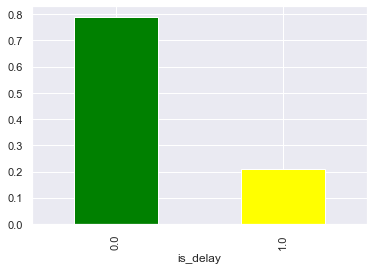

In [246]:
import matplotlib.pyplot as plt
c = ['green', 'yellow']

(data.groupby("is_delay").size()/len(data) ).plot(kind='bar',color = c)# Enter your code here
 

plt.show()

**Question**: What can you deduce from the bar plot about the ratio of delay vs. no delay?


Ratio of delayed fligths to non delayed flights is 1:4

**Questions**: 

- Which months have the most delays?
- What time of the day has the most delays?
- What day of the week has the most delays?
- Which airline has the most delays?
- Which origin and destination airports have the most delays?
- Is flight distance a factor in the delays?

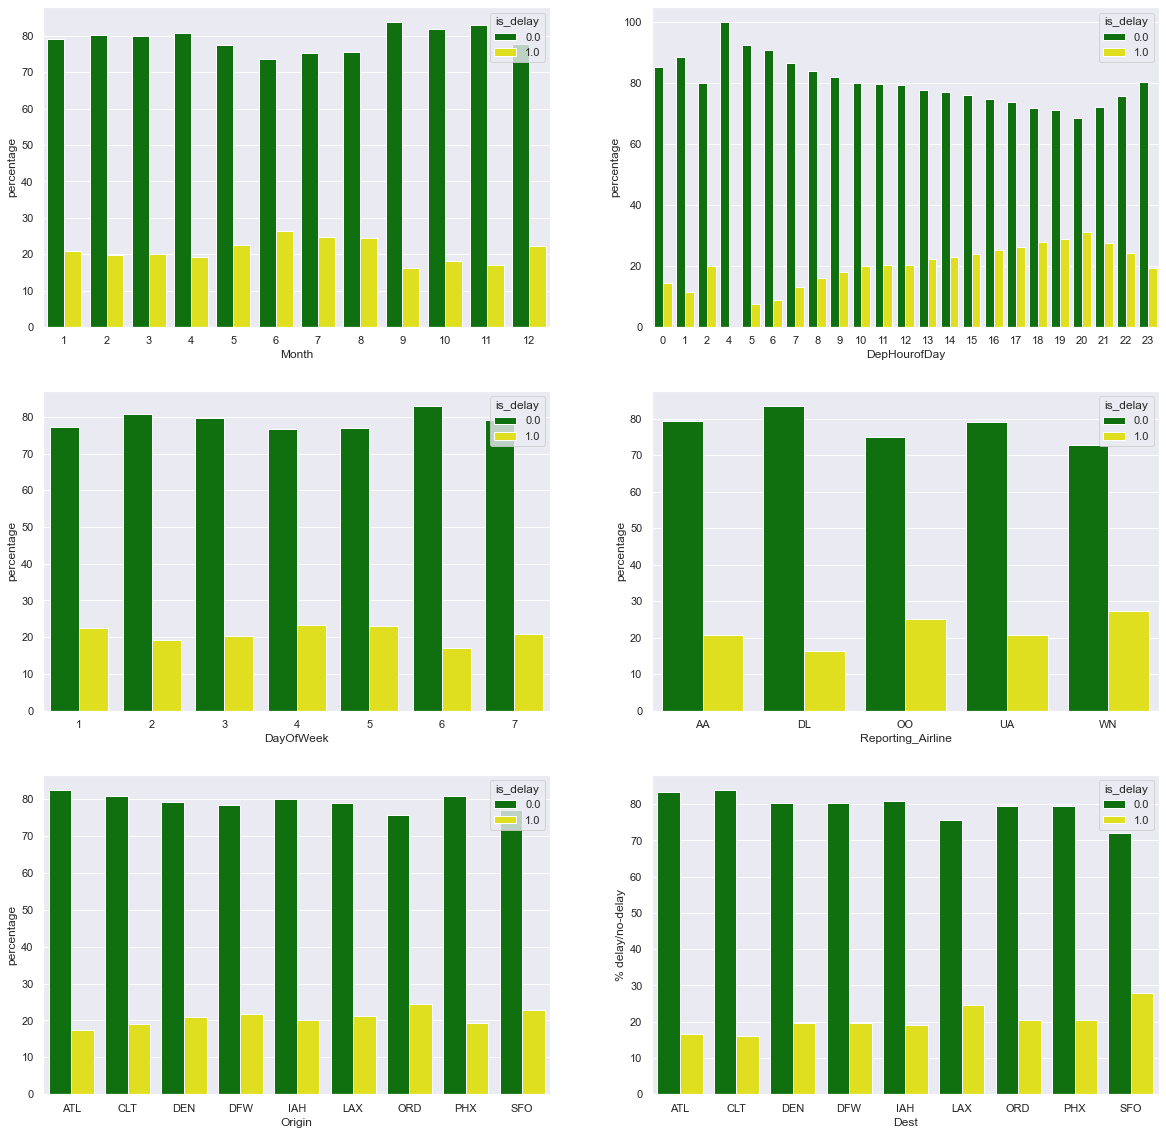

In [247]:
viz_columns = ['Month', 'DepHourofDay', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest']
fig, axes = plt.subplots(3, 2, figsize=(20,20), squeeze=False)
c = ['green', 'yellow']
# fig.autofmt_xdate(rotation=90)

for idx, column in enumerate(viz_columns):
    ax = axes[idx//2, idx%2]
    temp = data.groupby(column)['is_delay'].value_counts(normalize=True).rename('percentage').\
    mul(100).reset_index().sort_values(column)
    sns.barplot(x=column, y="percentage", hue="is_delay",palette=c, data=temp, ax=ax)
    plt.ylabel('% delay/no-delay')
    

plt.show()





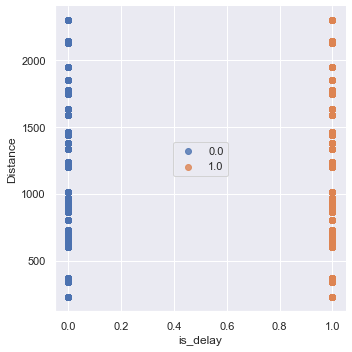

In [248]:
sns.lmplot( x="is_delay", y="Distance", data=data, fit_reg=False, hue='is_delay', legend=False)
plt.legend(loc='center')
plt.xlabel('is_delay')
plt.ylabel('Distance')
plt.show()


    Which months have the most delays?
    
    June, July, August shows maximum number of delays. 
    
   
    What time of the day has the most delays?
    from above graph, we can say that 8pm shows highest number of flight delays.
    
    
    What day of the week has the most delays?
    Thursday and Friday has maximum delay of flights.
    
    
    
    Which airline has the most delays?
    WN shows maximum delays among all airlines.
    
    
    
    Which origin and destination airports have the most delays?
    ORD and SFO are origin and destination airports experiencing highest number of delays respectively.
    
    
    
    
    Is flight distance a factor in the delays?
    We can't say from the above graph. As graph shows no diffrence between delays and no delays respective of distance.

### Features

Look at all the columns and what their specific types are.

In [249]:
data.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay'],
      dtype='object')

In [250]:
data.dtypes

Year                   int64
Quarter                int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
FlightDate            object
Reporting_Airline     object
Origin                object
OriginState           object
Dest                  object
DestState             object
CRSDepTime             int64
Cancelled            float64
Diverted             float64
Distance             float64
DistanceGroup          int64
ArrDelay             float64
ArrDelayMinutes      float64
is_delay             float64
AirTime              float64
DepHourofDay           int64
dtype: object

Filtering the required columns:
- Date is redundant, because you have Year, Quarter, Month, DayofMonth, and DayOfWeek to describe the date.
- Use Origin and Dest codes instead of OriginState and DestState.
- Because you are just classifying whether the flight is delayed or not, you don't need TotalDelayMinutes, DepDelayMinutes, and ArrDelayMinutes.

Treat DepHourofDay as a categorical variable because it doesn't have any quantitative relation with the target.
- If you had to do a one-hot encoding of it, it would result in 23 more columns.
- Other alternatives to handling categorical variables include hash encoding, regularized mean encoding, and bucketizing the values, among others.
- Just split into buckets here.

**Hint**: To change a column type to category, use the `astype` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html)).

In [251]:
data_orig = data.copy()
data = data[[ 'is_delay', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay']]
categorical_columns  = ['Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'DepHourofDay']
for c in categorical_columns:
    data[c] = data[c].astype('category')# Enter your code here

To use one-hot encoding, use the Pandas `get_dummies` function for the categorical columns that you selected above. Then, you can concatenate those generated features to your original dataset using the Pandas `concat` function. For encoding categorical variables, you can also use *dummy encoding* by using a keyword `drop_first=True`. For more information on dummy encoding, see https://en.wikiversity.org/wiki/Dummy_variable_(statistics).

For example:
```
pd.get_dummies(df[['column1','columns2']], drop_first=True)
```

In [252]:
data_dummies = pd.get_dummies(data[categorical_columns[0:7]], drop_first=True) # Enter your code here
data = pd.concat([data,data_dummies], axis = 1)
data.drop(categorical_columns,axis=1, inplace=True)

In [253]:
data_dummies

Quarter_2  Quarter_3  Quarter_4  Month_2  Month_3  Month_4  Month_5  \
0                0          0          0        0        0        0        0   
1                0          0          0        0        0        0        0   
2                0          0          0        0        0        0        0   
3                0          0          0        0        0        0        0   
4                0          0          0        0        0        0        0   
...            ...        ...        ...      ...      ...      ...      ...   
1658125          0          1          0        0        0        0        0   
1658126          0          1          0        0        0        0        0   
1658127          0          1          0        0        0        0        0   
1658128          0          1          0        0        0        0        0   
1658129          0          1          0        0        0        0        0   

         Month_6  Month_7  Month_8  ...  Origin_PHX  Origin_SFO  Dest_CLT  \
0              0        0        0  ...           0           0         0   
1              0        0        0  ...           0           0         0   
2              0        0        0  ...           0           0         0   
3              0        0        0  ...           0           0         0   
4              0        0        0  ...           1           0         0   
...          ...      ...      ...  ...         ...         ...       ...   
1658125        0        0        0  ...           0           0         0   
1658126        0        0        0  ...           0           0         0   
1658127        0        0        0  ...           0           0         0   
1658128        0        0        0  ...           0           0         0   
1658129        0        0        0  ...           0           0         0   

         Dest_DEN  Dest_DFW  Dest_IAH  Dest_LAX  Dest_ORD  Dest_PHX  Dest_SFO  
0               0         0         1         0         0         0         0  
1               0         0         0         0         0         0         0  
2               1         0         0         0         0         0         0  
3               0         0         0         0         0         1         0  
4               0         0         0         0         0         0         0  
...           ...       ...       ...       ...       ...       ...       ...  
1658125         0         0         0         0         0         1         0  
1658126         0         0         0         0         0         0         1  
1658127         0         0         0         0         0         0         1  
1658128         0         0         0         0         0         0         1  
1658129         0         0         0         0         0         0         1  

[1635590 rows x 70 columns]

Check the length of the dataset and the new columnms.

In [254]:
# Enter your code here
data.shape

(1635590, 72)

In [255]:
# Enter your code here
data.columns

Index(['is_delay', 'Distance', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN',

**Sample Answer:** 
```
Index(['Distance', 'is_delay', 'Quarter_2', 'Quarter_3', 'Quarter_4',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO'],
      dtype='object')
```

Now you are ready to do model training. Before splitting the data, rename the column `is_delay` to `target`.

**Hint**: You can use the Pandas `rename` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)).

In [256]:
data.rename(columns = {"is_delay":"target"}, inplace=True )# Enter your code here

In [257]:
# write code to Save the combined csv file (combined_csv_v1.csv) to your local computer
# note this combined file will be used in part B

data.to_csv("combined_csv_v1.csv", sep='\t')

# Step 3: Model training and evaluation

1. Split the data into `train_data`, and `test_data` using `sklearn.model_selection.train_test_split`.  
2. Build a logistic regression model for the data, where training data is 80%, and test data is 20%.

Use the following cells to complete these steps. Insert and delete cells where needed.


### Train test split

In [258]:
# write Code here to split data into train, validate and test
y = data['target']
X  = data.drop(columns=['target'])
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=123)

### Baseline classification model

In [261]:
# <write code here>
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=8).fit(x_train, y_train)
pred = clf.predict_proba(x_test)[::,1]

In [262]:
clf.score(x_test, y_test)


0.7910203657395802

## Model evaluation
In this section, you'll evaluate your trained model on test data and report on the following metrics:
* Confusion Matrix plot
* Plot the ROC
* Report statistics such as Accuracy, Percision, Recall, Sensitivity and Specificity

To view a plot of the confusion matrix, and various scoring metrics, create a couple of functions:

In [263]:
from sklearn.metrics import plot_confusion_matrix
 

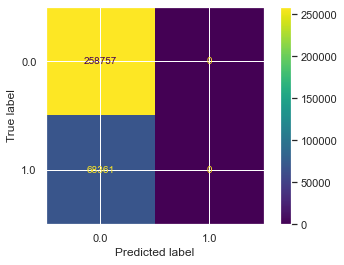

In [264]:
plot_confusion_matrix(clf,x_test,y_test)
plt.show()

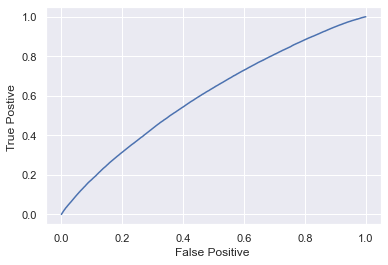

In [265]:
def plot_roc(test_labels,target_predicted):
    fpos, tpos, _ = metrics.roc_curve(test_labels,target_predicted)
    plt.plot(fpos,tpos)
    plt.ylabel("True Postive ")
    plt.xlabel("False Positive ")
    plt.show()

    

pred = clf.predict_proba(x_test)[::,1]
plot_roc(y_test,pred)

In [266]:
from sklearn.metrics import classification_report

y_true = y_test
classnames = ['0', '1']
print(classification_report(y_true, y_pred, target_names=classnames))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88    258757
           1       0.00      0.00      0.00     68361

    accuracy                           0.79    327118
   macro avg       0.40      0.50      0.44    327118
weighted avg       0.63      0.79      0.70    327118



To plot the confusion matrix, call the `plot_confusion_matrix` function on the `test_labels` and `target_predicted` data from your batch job:

To print statistics and plot an ROC curve, call the `plot_roc` function on the `test_labels` and `target_predicted` data from your batch job:

### Key questions to consider:
1. How does your model's performance on the test set compare to the training set? What can you deduce from this comparison? 

2. Are there obvious differences between the outcomes of metrics like accuracy, precision, and recall? If so, why might you be seeing those differences? 

3. Is the outcome for the metric(s) you consider most important sufficient for what you need from a business standpoint? If not, what are some things you might change in your next iteration (in the feature engineering section, which is coming up next)? 

Use the cells below to answer these and other questions. Insert and delete cells where needed.


**Question**: What can you summarize from the confusion matrix?


Above confusing matrix is not giving clear outcomes. it is giving zero value for class 1. 

precision is 0.63
recall is 0.79
f1 score is 0.7

# Step 4: Deployment

1. In this step you are required to push your source code and requirements file to a GitLab repository without the data files. Please use the Git commands to complete this task
2- Create a “readme.md” markdown file that describes the code of this repository and how to run it and what the user would expect if got the code running.

In the cell below provide the link of the pushed repository on your GitLab account.


### Provide a link for your Gitlab repository here

https://gitlab.com/nehapandey2212/finalassn_flightdelay

# Iteration II

# Step 5: Feature engineering

You've now gone through one iteration of training and evaluating your model. Given that the outcome you reached for your model the first time probably wasn't sufficient for solving your business problem, what are some things you could change about your data to possibly improve model performance?

### Key questions to consider:
1. How might the balance of your two main classes (delay and no delay) impact model performance?
2. Do you have any features that are correlated?
3. Are there feature reduction techniques you could perform at this stage that might have a positive impact on model performance? 
4. Can you think of adding some more data/datasets?
4. After performing some feature engineering, how does your model performance compare to the first iteration?

Use the cells below to perform specific feature engineering techniques (per the questions above) that you think could improve your model performance. Insert and delete cells where needed.


Before you start, think about why the precision and recall are around 80% while the accuracy is 99%.

#### Add more features

1. Holidays
2. Weather

Because the list of holidays from 2014 to 2018 is known, you can create an indicator variable **is_holiday** to mark these.
The hypothesis is that airplane delays could be higher during holidays compared to the rest of the days. Add a boolean variable `is_holiday` that includes the holidays for the years 2014-2018.

In [165]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

In [267]:
# Source: http://www.calendarpedia.com/holidays/federal-holidays-2014.html

holidays_14 = ['2014-01-01',  '2014-01-20', '2014-02-17', '2014-05-26', '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11', '2014-11-27', '2014-12-25' ] 
holidays_15 = ['2015-01-01',  '2015-01-19', '2015-02-16', '2015-05-25', '2015-06-03', '2015-07-04', '2015-09-07', '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25'] 
holidays_16 = ['2016-01-01',  '2016-01-18', '2016-02-15', '2016-05-30', '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11', '2016-11-24', '2016-12-25', '2016-12-26']
holidays_17 = ['2017-01-02', '2017-01-16', '2017-02-20', '2017-05-29' , '2017-07-04', '2017-09-04' ,'2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25']
holidays_18 = ['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28' , '2018-07-04', '2018-09-03' ,'2018-10-08', '2018-11-12','2018-11-22', '2018-12-25']
holidays = holidays_14+ holidays_15+ holidays_16 + holidays_17+ holidays_18

### Add indicator variable for holidays


In [268]:
def holiday_function(row):
    if row["FlightDate"] in holidays:
        return 1
    else:
        return 0   

In [269]:
data_orig['is_holiday'] = data_orig.apply(lambda row: holiday_function(row), axis=1)


Weather data was fetched from https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&stations=USW00023174,USW00012960,USW00003017,USW00094846,USW00013874,USW00023234,USW00003927,USW00023183,USW00013881&dataTypes=AWND,PRCP,SNOW,SNWD,TAVG,TMIN,TMAX&startDate=2014-01-01&endDate=2018-12-31.
<br>

This dataset has information on wind speed, precipitation, snow, and temperature for cities by their airport codes.

**Question**: Could bad weather due to rains, heavy winds, or snow lead to airplane delay? Let's check!

In [68]:
# download data from the link above and place it into the data folder

Import weather data prepared for the airport codes in our dataset. Use the stations and airports below for the analysis, and create a new column called `airport` that maps the weather station to the airport name.

In [272]:
weather = pd.read_csv('daily-summaries-2022-11-01T01-23-22.csv') # Enter your code here to read 'daily-summaries.csv' file
station = ['USW00023174','USW00012960','USW00003017','USW00094846',
           'USW00013874','USW00023234','USW00003927','USW00023183','USW00013881'] 
airports = ['LAX', 'IAH', 'DEN', 'ORD', 'ATL', 'SFO', 'DFW', 'PHX', 'CLT']

temp_dic = {station[i]: airports[i] for i in range(len(station))}

In [273]:
weather["airport"] = weather["STATION"].map(temp_dic)

Create another column called `MONTH` from the `DATE` column.

In [274]:
weather['MONTH'] = weather['DATE'].apply(lambda x: x.split('-')[1])# Enter your code here 
weather.head()

STATION        DATE  AWND  PRCP  SNOW  SNWD   TAVG   TMAX   TMIN  \
0  USW00023174  2014-01-01    16     0   NaN   NaN  131.0  178.0   78.0   
1  USW00023174  2014-01-02    22     0   NaN   NaN  159.0  256.0  100.0   
2  USW00023174  2014-01-03    17     0   NaN   NaN  140.0  178.0   83.0   
3  USW00023174  2014-01-04    18     0   NaN   NaN  136.0  183.0  100.0   
4  USW00023174  2014-01-05    18     0   NaN   NaN  151.0  244.0   83.0   

  airport MONTH  
0     LAX    01  
1     LAX    01  
2     LAX    01  
3     LAX    01  
4     LAX    01

### Sample output
```
  STATION     DATE      AWND PRCP SNOW SNWD TAVG TMAX  TMIN airport MONTH
0 USW00023174 2014-01-01 16   0   NaN  NaN 131.0 178.0 78.0  LAX    01
1 USW00023174 2014-01-02 22   0   NaN  NaN 159.0 256.0 100.0 LAX    01
2 USW00023174 2014-01-03 17   0   NaN  NaN 140.0 178.0 83.0  LAX    01
3 USW00023174 2014-01-04 18   0   NaN  NaN 136.0 183.0 100.0 LAX    01
4 USW00023174 2014-01-05 18   0   NaN  NaN 151.0 244.0 83.0  LAX    01
```

Analyze and handle the `SNOW` and `SNWD` columns for missing values using `fillna()`. Use the `isna()` function to check the missing values for all the columns.

In [275]:
weather.SNOW.fillna(weather["SNOW"].mean(), inplace=True)# Enter your code here
weather.SNWD.fillna(weather["SNWD"].mean(),inplace=True)# Enter your code here
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG       62
TMAX       20
TMIN       20
airport     0
MONTH       0
dtype: int64

**Question**: Print the index of the rows that have missing values for TAVG, TMAX, TMIN.

**Hint**: Use the `isna()` function to find the rows that are missing, and then use the list on the idx variable to get the index.

In [276]:
idx = np.array([i for i in range(len(weather))])
TAVG_idx = weather[weather['TAVG'].isnull()].index.to_numpy()
TMAX_idx = weather[weather['TMAX'].isnull()].index.to_numpy()
TMIN_idx = weather[weather['TMIN'].isnull()].index.to_numpy() 
TAVG_idx

array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420],
      dtype=int64)

### Sample output

```
array([ 3956,  3957,  3958,  3959,  3960,  3961,  3962,  3963,  3964,
        3965,  3966,  3967,  3968,  3969,  3970,  3971,  3972,  3973,
        3974,  3975,  3976,  3977,  3978,  3979,  3980,  3981,  3982,
        3983,  3984,  3985,  4017,  4018,  4019,  4020,  4021,  4022,
        4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,  4031,
        4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,  4040,
        4041,  4042,  4043,  4044,  4045,  4046,  4047, 13420])
```

You can replace the missing TAVG, TMAX, and TMIN with the average value for a particular station/airport. Because the consecutive rows of TAVG_idx are missing, replacing with a previous value would not be possible. Instead, replace it with the mean. Use the `groupby` function to aggregate the variables with a mean value.

In [277]:
weather_impute = weather.groupby(["STATION","MONTH"]).agg({'TAVG':'mean','TMAX':'mean', 'TMIN':'mean' }).reset_index()# Enter your code here
weather_impute

STATION MONTH        TAVG        TMAX        TMIN
0    USW00003017    01   -2.741935   74.000000  -69.858065
1    USW00003017    02   11.219858   88.553191  -65.035461
2    USW00003017    03   64.722581  146.858065  -17.070968
3    USW00003017    04   91.200000  167.440000   14.246667
4    USW00003017    05  132.580645  206.496774   65.283871
..           ...   ...         ...         ...         ...
103  USW00094846    08  231.000000  281.000000  183.503226
104  USW00094846    09  201.226667  251.826667  149.953333
105  USW00094846    10  127.683871  173.116129   79.916129
106  USW00094846    11   45.820000   85.680000    2.100000
107  USW00094846    12   -2.735484   29.522581  -36.703226

[108 rows x 5 columns]

Merge the mean data with the weather data.

In [278]:
### get the yesterday's data
weather = pd.merge(weather, weather_impute,  how='left', left_on=['MONTH','STATION'], right_on = ['MONTH','STATION'])\
.rename(columns = {'TAVG_y':'TAVG_AVG',
                   'TMAX_y':'TMAX_AVG', 
                   'TMIN_y':'TMIN_AVG',
                   'TAVG_x':'TAVG',
                   'TMAX_x':'TMAX', 
                   'TMIN_x':'TMIN'})

In [279]:
weather

STATION        DATE  AWND  PRCP      SNOW      SNWD   TAVG   TMAX  \
0      USW00023174  2014-01-01    16     0  1.122855  3.487222  131.0  178.0   
1      USW00023174  2014-01-02    22     0  1.122855  3.487222  159.0  256.0   
2      USW00023174  2014-01-03    17     0  1.122855  3.487222  140.0  178.0   
3      USW00023174  2014-01-04    18     0  1.122855  3.487222  136.0  183.0   
4      USW00023174  2014-01-05    18     0  1.122855  3.487222  151.0  244.0   
...            ...         ...   ...   ...       ...       ...    ...    ...   
16429  USW00013881  2018-12-27    31    41  0.000000  0.000000   68.0   89.0   
16430  USW00013881  2018-12-28    27   196  0.000000  0.000000   86.0  144.0   
16431  USW00013881  2018-12-29    14     0  0.000000  0.000000  146.0  189.0   
16432  USW00013881  2018-12-30    16    23  0.000000  0.000000  117.0  139.0   
16433  USW00013881  2018-12-31    29    41  0.000000  0.000000  135.0  194.0   

        TMIN airport MONTH    TAVG_AVG    TMAX_AVG    TMIN_AVG  
0       78.0     LAX    01  148.619355  198.154839  103.477419  
1      100.0     LAX    01  148.619355  198.154839  103.477419  
2       83.0     LAX    01  148.619355  198.154839  103.477419  
3      100.0     LAX    01  148.619355  198.154839  103.477419  
4       83.0     LAX    01  148.619355  198.154839  103.477419  
...      ...     ...   ...         ...         ...         ...  
16429   39.0     CLT    12   87.670968  138.870968   31.625806  
16430   61.0     CLT    12   87.670968  138.870968   31.625806  
16431   94.0     CLT    12   87.670968  138.870968   31.625806  
16432   89.0     CLT    12   87.670968  138.870968   31.625806  
16433  117.0     CLT    12   87.670968  138.870968   31.625806  

[16434 rows x 14 columns]

Check for missing values again.

In [280]:
weather.TAVG[TAVG_idx] = weather.TAVG_AVG[TAVG_idx]
weather.TMAX[TMAX_idx] = weather.TMAX_AVG[TMAX_idx]
weather.TMIN[TMIN_idx] = weather.TMIN_AVG[TMIN_idx]
weather.isna().sum()

STATION     0
DATE        0
AWND        0
PRCP        0
SNOW        0
SNWD        0
TAVG        0
TMAX        0
TMIN        0
airport     0
MONTH       0
TAVG_AVG    0
TMAX_AVG    0
TMIN_AVG    0
dtype: int64

Drop `STATION,MONTH,TAVG_AVG,TMAX_AVG,TMIN_AVG,TMAX,TMIN,SNWD` from the dataset

In [281]:
weather.drop(columns=['STATION','MONTH','TAVG_AVG', 'TMAX_AVG', 'TMIN_AVG', 'TMAX' ,'TMIN', 'SNWD'],inplace=True)

Add the origin and destination weather conditions to the dataset.

In [282]:
### Add origin weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Origin'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_O','PRCP':'PRCP_O', 'TAVG':'TAVG_O', 'SNOW': 'SNOW_O'})\
.drop(columns=['DATE','airport'])

### Add destination weather conditions
data_orig = pd.merge(data_orig, weather,  how='left', left_on=['FlightDate','Dest'], right_on = ['DATE','airport'])\
.rename(columns = {'AWND':'AWND_D','PRCP':'PRCP_D', 'TAVG':'TAVG_D', 'SNOW': 'SNOW_D'})\
.drop(columns=['DATE','airport'])

**Note**: It is always a good practice to check nulls/NAs after joins.

In [283]:
sum(data.isna().any())

0

In [284]:
data_orig.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Reporting_Airline', 'Origin', 'OriginState', 'Dest', 'DestState',
       'CRSDepTime', 'Cancelled', 'Diverted', 'Distance', 'DistanceGroup',
       'ArrDelay', 'ArrDelayMinutes', 'is_delay', 'AirTime', 'DepHourofDay',
       'is_holiday', 'AWND_O', 'PRCP_O', 'SNOW_O', 'TAVG_O', 'AWND_D',
       'PRCP_D', 'SNOW_D', 'TAVG_D'],
      dtype='object')

Convert the categorical data into numerical data using one-hot encoding.

In [285]:
data = data_orig.copy()
data = data[['is_delay', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest','Distance','DepHourofDay','is_holiday', 'AWND_O', 'PRCP_O',
       'TAVG_O', 'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D']]


categorical_columns  = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 
       'Reporting_Airline', 'Origin', 'Dest', 'is_holiday','is_delay']
for c in categorical_columns:
    data[c] = data[c].astype('category')

In [286]:
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)

In [287]:
data = data.drop_duplicates()

### Sample code

```
data_dummies = pd.get_dummies(data[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Reporting_Airline', 'Origin', 'Dest', 'is_holiday']], drop_first=True)
data = pd.concat([data, data_dummies], axis = 1)
categorical_columns.remove('is_delay')
data.drop(categorical_columns,axis=1, inplace=True)
```

Check the new columns.

In [288]:
data.columns

Index(['is_delay', 'Distance', 'DepHourofDay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayO

### Sample output

```
Index(['Distance', 'DepHourofDay', 'is_delay', 'AWND_O', 'PRCP_O', 'TAVG_O',
       'AWND_D', 'PRCP_D', 'TAVG_D', 'SNOW_O', 'SNOW_D', 'Year_2015',
       'Year_2016', 'Year_2017', 'Year_2018', 'Quarter_2', 'Quarter_3',
       'Quarter_4', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6',
       'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'DayofMonth_2', 'DayofMonth_3', 'DayofMonth_4', 'DayofMonth_5',
       'DayofMonth_6', 'DayofMonth_7', 'DayofMonth_8', 'DayofMonth_9',
       'DayofMonth_10', 'DayofMonth_11', 'DayofMonth_12', 'DayofMonth_13',
       'DayofMonth_14', 'DayofMonth_15', 'DayofMonth_16', 'DayofMonth_17',
       'DayofMonth_18', 'DayofMonth_19', 'DayofMonth_20', 'DayofMonth_21',
       'DayofMonth_22', 'DayofMonth_23', 'DayofMonth_24', 'DayofMonth_25',
       'DayofMonth_26', 'DayofMonth_27', 'DayofMonth_28', 'DayofMonth_29',
       'DayofMonth_30', 'DayofMonth_31', 'DayOfWeek_2', 'DayOfWeek_3',
       'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7',
       'Reporting_Airline_DL', 'Reporting_Airline_OO', 'Reporting_Airline_UA',
       'Reporting_Airline_WN', 'Origin_CLT', 'Origin_DEN', 'Origin_DFW',
       'Origin_IAH', 'Origin_LAX', 'Origin_ORD', 'Origin_PHX', 'Origin_SFO',
       'Dest_CLT', 'Dest_DEN', 'Dest_DFW', 'Dest_IAH', 'Dest_LAX', 'Dest_ORD',
       'Dest_PHX', 'Dest_SFO', 'is_holiday_1'],
      dtype='object')
```

Rename the `is_delay` column to `target` again. Use the same code as before.

In [289]:
data.rename(columns = {"is_delay":"target"}, inplace=True )# Enter your code here

In [290]:
# write code to Save the new combined csv file (combined_csv_v2.csv) to your local computer
# note this combined file will be also used in part B

data.to_csv("combined_csv_v2.csv", sep='\t')

Create the training and testing sets again.

In [291]:
# Enter your code here
y = data['target']
X  = data.drop(columns=['target'])
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)

### New baseline classifier

Now, see if these new features add any predictive power to the model.

In [292]:
# Instantiate another logistic regression model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [293]:
# Enter your code here
clf.score(x_test, y_test)

0.7888801908596138

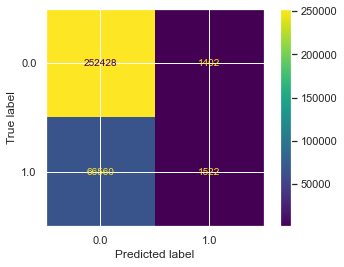

In [294]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,x_test,y_test)
plt.show()

In [295]:
from sklearn.metrics import classification_report

y_true = y_test
classnames = ['0', '1']
print(classification_report(y_true, y_pred, target_names=classnames))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88    253830
           1       0.52      0.02      0.04     68082

    accuracy                           0.79    321912
   macro avg       0.66      0.51      0.46    321912
weighted avg       0.73      0.79      0.70    321912



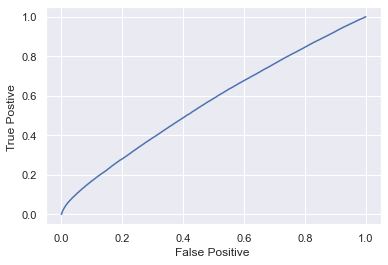

In [296]:
def plot_roc(test_labels,target_predicted):
    fpos, tpos, _ = metrics.roc_curve(test_labels,target_predicted)
    plt.plot(fpos,tpos)
    plt.ylabel("True Postive ")
    plt.xlabel("False Positive ")
    plt.show()

    

pred = clf.predict_proba(x_test)[::,1]
plot_roc(y_test,pred)

In [95]:
data

target  Distance  DepHourofDay  AWND_O  PRCP_O  TAVG_O  AWND_D  \
0          0.0     689.0            21      33       0    54.0      30   
1          0.0     731.0             9      39       0   136.0      33   
2          0.0    1199.0            18      33       0    54.0      77   
3          0.0    1587.0            16      33       0    54.0      20   
4          0.0    1587.0             7      20       0   165.0      33   
...        ...       ...           ...     ...     ...     ...     ...   
1635585    0.0     602.0            11      47       0   247.0      31   
1635586    0.0     967.0             8      47       0   247.0      86   
1635587    1.0     967.0            12      47       0   247.0      86   
1635588    0.0     967.0            22      47       0   247.0      86   
1635589    0.0     967.0            16      47       0   247.0      86   

         PRCP_D  TAVG_D    SNOW_O  ...  Origin_SFO  Dest_CLT  Dest_DEN  \
0             0   130.0  0.000000  ...           0         0         0   
1             0    54.0  0.000000  ...           0         0         0   
2             0    68.0  0.000000  ...           0         0         1   
3             0   165.0  0.000000  ...           0         0         0   
4             0    54.0  1.122855  ...           0         0         0   
...         ...     ...       ...  ...         ...       ...       ...   
1635585       0   348.0  0.000000  ...           0         0         0   
1635586       0   161.0  0.000000  ...           0         0         0   
1635587       0   161.0  0.000000  ...           0         0         0   
1635588       0   161.0  0.000000  ...           0         0         0   
1635589       0   161.0  0.000000  ...           0         0         0   

         Dest_DFW  Dest_IAH  Dest_LAX  Dest_ORD  Dest_PHX  Dest_SFO  \
0               0         1         0         0         0         0   
1               0         0         0         0         0         0   
2               0         0         0         0         0         0   
3               0         0         0         0         1         0   
4               0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...   
1635585         0         0         0         0         1         0   
1635586         0         0         0         0         0         1   
1635587         0         0         0         0         0         1   
1635588         0         0         0         0         0         1   
1635589         0         0         0         0         0         1   

         is_holiday_1  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
1635585             0  
1635586             0  
1635587             0  
1635588             0  
1635589             0  

[1609558 rows x 86 columns]

Perform the evaluaion as you have done with the previous model and plot/show the same metrics

Question: did you notice a difference by adding the extra data on the results?

confusion matrix is showing better results. Earlier the precision of class 1 was zero which got improved 


# Step 6: Using Tableau

Use Tableau to load the combined_csv_v2.csv file and build a dashboard that show your understanding of the data and business problem. 
### what to do:
1. Load the data into Tableau and build the dashboard
2. Share the dashboard on your Tableau public account 
3. Copy the link of the shared dashboard below

Note: The dashboard needs to be self explainable to others, so make it simple and add only the features that you feel heighlight the main question(s) of the prblem statement.

# copy the link
https://public.tableau.com/app/profile/neha.pandey2212/viz/Neha_Flightdelay/Dashboard1

## Conclusion

You've now gone through at least a couple iterations of training and evaluating your model. It's time to wrap up this project and reflect on what you've learned and what types of steps you might take moving forward (assuming you had more time). Use the cell below to answer some of these and other relevant questions:

1. Does your model performance meet your business goal? If not, what are some things you'd like to do differently if you had more time for tuning?
2. To what extent did your model improve as you made changes to your dataset? What types of techniques did you employ throughout this project that you felt yielded the greatest improvements in your model?
3. What were some of the biggest challenges you encountered throughout this project?
4. What were the three most important things you learned about machine learning while completing this project?

1. No, Our model doesnt meet our business goal.If we have more time and resources, we would have opted for more data and better model that could take advantage of our computational resources.

2. Addition of weather data imporved accuracy of the model predcting a particular class.One hot encoding used in this project probably yielded best results for the model.


3.The biggest challenge we encountered during this project is our lack of hardware resources and dealing with a large dataset.

4. a) Reading, cleaning and preprocessing large dataset.
    b) Combing different datasets to match our business problem.
    c)Useage of Amazon sagemaker and deploying the models.
